## Analyze Amazon Store Products Reviews Data.
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
from collections import defaultdict
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as iplot

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Loading data:

In [2]:
data = pd.read_csv( 'Musical_instruments_reviews.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### The data at a glance:

In [3]:
data.head(5)

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary  unixReviewTime   reviewTime  
0                                   good      1393545600  02 28, 2014  
1                                   Jake      1363392000  03 16, 2013  
2                   It Does The Job Well      1377648000  08 28, 2013  
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014  
4  No more pops when I record my vocals.      1392940800  02 21, 2014

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Does the data have the expected shape?
The shape of the  data is (row, column):(10261, 9)

In [4]:
data.shape

(10261, 9)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### What is the data type?

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### How many different products are in the dataset?
There are 900 different products in the dataset

In [6]:
len(set(data.asin))

900

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### How many reviews are individual reviewers writing?

The below table show us that the number of reviewes given by a certain customer ranges between 5 and 42 reviews. Oddly there aren't any reviewers who wrote less than 5 reviews. Seems like they either removed all reviewers who didn't have at least 5 reviews or their method of obtaining the reviews didn't allow them to capture infrequent reviewers. This means we are most likely looking only at frequent reviewers instead of all reviewers.

In [7]:
pd.DataFrame(data['reviewerID'].value_counts().describe().round(1)) #groub by productID

reviewerID
count      1429.0
mean          7.2
std           3.7
min           5.0
25%           5.0
50%           6.0
75%           8.0
max          42.0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### How many reviewers are there?

There are 1429 reviewers writing 10261 reviews.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
#### Are there any missing values?
Yes. There are 27 missing reviewer names and 7 missing reviewer texts.

In [8]:
pd.DataFrame(data.isnull().sum())

0
reviewerID       0
asin             0
reviewerName    27
helpful          0
reviewText       7
overall          0
summary          0
unixReviewTime   0
reviewTime       0

Fill the Null Values in reviewText with "Missing Review Text" and reviewerName will be drop

In [9]:
data['reviewText']=data['reviewText'].fillna('Missing Review Text')
pd.DataFrame(data.isnull().sum())

0
reviewerID       0
asin             0
reviewerName    27
helpful          0
reviewText       0
overall          0
summary          0
unixReviewTime   0
reviewTime       0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Can a reviewer reviews a product multiple times?
Maybe they can but no one did in the dataset.

In [10]:
pd.DataFrame(data.groupby(['reviewerID','asin'])['reviewText'].count().describe().round(2))

reviewText
count     10261.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### How many reviews are there per product?
The average amount of reviews is 11 per product, the highest amount of reviews is 163 per product and the lowest amount of reviews is 5 per product.

In [11]:
pd.DataFrame(data.groupby(['asin'])['reviewText'].count().describe().round(2))

reviewText
count      900.00
mean        11.40
std         12.93
min          5.00
25%          6.00
50%          8.00
75%         12.00
max        163.00

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Identify The Count Words of the Review Text

In [12]:
data['reviewText_word_count'] = data['reviewText'].apply(lambda x: len(str(x).split()))
#data.head(5)

In [13]:
pd.DataFrame(data['reviewText_word_count'].describe()).round(2)

reviewText_word_count
count               10261.00
mean                   90.19
std                   111.23
min                     1.00
25%                    31.00
50%                    54.00
75%                   104.00
max                  2043.00

We can see that the average word count of one review is 90 words and the minimum count is 1 and the maximum count used is 2043 words.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Identify The Count Words of the Summary

In [14]:
data['summary_word_count'] = data['summary'].apply(lambda x: len(str(x).split()))
#data.head(5)

In [15]:
pd.DataFrame(data['summary_word_count'].describe()).round(2)

summary_word_count
count            10261.00
mean                 4.37
std                  2.85
min                  1.00
25%                  2.00
50%                  4.00
75%                  6.00
max                 25.00

We can see that the average word count of one summary is 4 words and the minimum count is 1 and the maximum count used is 25 words.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Extract the Day and Month, Year values to separate columns

In [16]:
data['Month&Day'] =data.apply(lambda row : row['reviewTime'].split(',')[0], axis=1)
data['year'] =data.apply(lambda row : row['reviewTime'].split(',')[1], axis=1)

In [17]:
data.head(5)

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary  unixReviewTime   reviewTime  \
0                                   good      1393545600  02 28, 2014   
1                                   Jake      1363392000  03 16, 2013   
2                   It Does The Job Well      1377648000  08 28, 2013   
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014   
4  No more pops when I record my vocals.      1392940800  02 21, 2014   

   reviewText_word_count  summary_word_count Month&Day   year  
0                     51                   1     02 28   2014  
1                    104                   1     03 16   2013  
2                     77                   5     08 28   2013  
3                     35                   5     02 14   2014  
4                     28                   8     02 21   2014

In [18]:
data['month'] =data.apply(lambda row : row['Month&Day'].split()[0], axis=1)
data['day'] =data.apply(lambda row : row['Month&Day'].split()[1], axis=1)

In [19]:
data.head(5)

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary  unixReviewTime   reviewTime  \
0                                   good      1393545600  02 28, 2014   
1                                   Jake      1363392000  03 16, 2013   
2                   It Does The Job Well      1377648000  08 28, 2013   
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014   
4  No more pops when I record my vocals.      1392940800  02 21, 2014   

   reviewText_word_count  summary_word_count Month&Day   year month day  
0                     51                   1     02 28   2014    02  28  
1                    104                   1     03 16   2013    03  16  
2                     77                   5     08 28   2013    08  28  
3                     35                   5     02 14   2014    02  14  
4                     28                   8     02 21   2014    02  21

In [20]:
print ("The shape of the  data is (row, column):"+ str(data.shape))

The shape of the  data is (row, column):(10261, 15)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Drop Unnecessary Columns

In [21]:
data.drop(['reviewerName','unixReviewTime','reviewTime', 'Month&Day'],axis=1, inplace=True)

In [22]:
data.head(5)

reviewerID        asin   helpful  \
0  A2IBPI20UZIR0U  1384719342    [0, 0]   
1  A14VAT5EAX3D9S  1384719342  [13, 14]   
2  A195EZSQDW3E21  1384719342    [1, 1]   
3  A2C00NNG1ZQQG2  1384719342    [0, 0]   
4   A94QU4C90B1AX  1384719342    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...      5.0   
1  The product does exactly as it should and is q...      5.0   
2  The primary job of this device is to block the...      5.0   
3  Nice windscreen protects my MXL mic and preven...      5.0   
4  This pop filter is great. It looks and perform...      5.0   

                                 summary  reviewText_word_count  \
0                                   good                     51   
1                                   Jake                    104   
2                   It Does The Job Well                     77   
3          GOOD WINDSCREEN FOR THE MONEY                     35   
4  No more pops when I record my vocals.                     28   

   summary_word_count   year month day  
0                   1   2014    02  28  
1                   1   2013    03  16  
2                   5   2013    08  28  
3                   5   2014    02  14  
4                   8   2014    02  21

In [23]:
print ("The shape of the  data is (row, column):"+ str(data.shape))

The shape of the  data is (row, column):(10261, 11)


### Data Visualization
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [24]:
data['overall'].unique()

array([5., 3., 4., 2., 1.])

In [25]:
s= data['overall'].value_counts()
pd.DataFrame(s)

overall
5.0     6938
4.0     2084
3.0      772
2.0      250
1.0      217

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Distribution of Overall in the Store

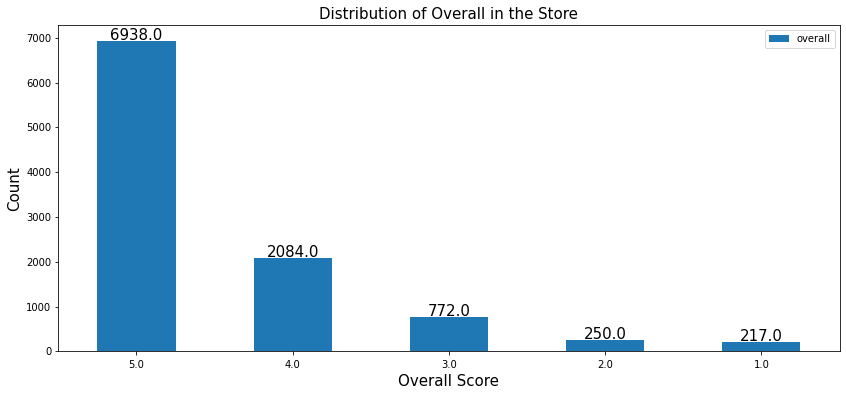

In [26]:
ax=s.plot(kind='bar', figsize=(14,6))
for i, v in s.reset_index().iterrows():
    ax.text(i, v.overall+ 120 , v.overall, color='black',ha="center", va="center",fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Overall Score',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Distribution of Overall in the Store',fontsize=15)
plt.legend()
plt.show()

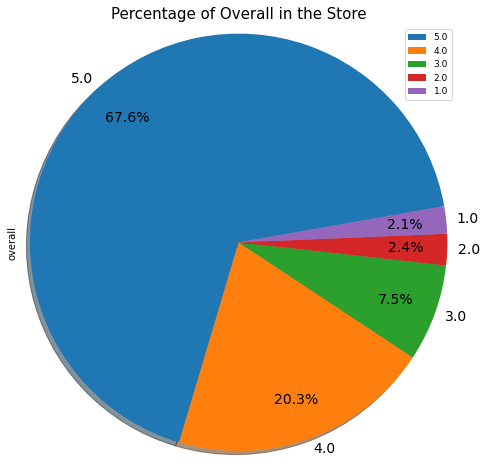

In [27]:
data['overall'].value_counts().plot(kind='pie',figsize=(8,8),radius=1.2,startangle=10,autopct='%0.1f%%',
      shadow=True,fontsize=14,labeldistance=1.05,pctdistance=0.8)

plt.title('Percentage of Overall in the Store',fontsize=15)
plt.legend(loc='upper right', prop={'size':9})
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 20 Most Reviewed Products

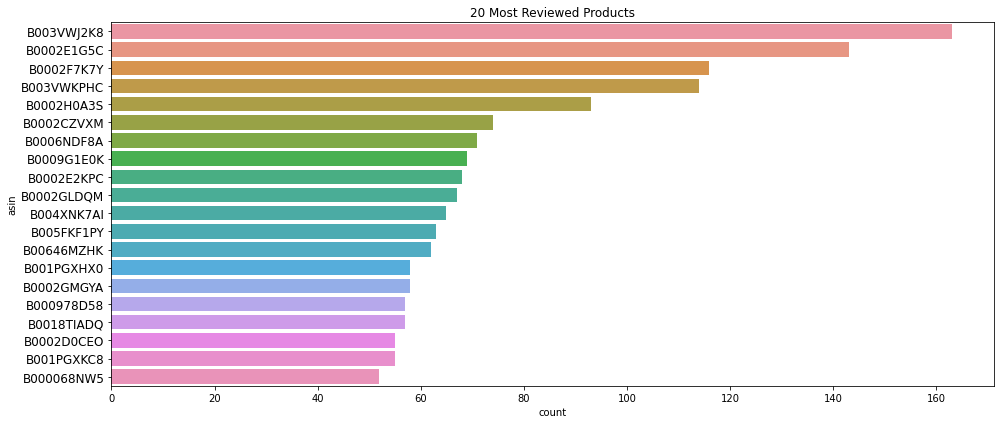

In [28]:
plt.figure(figsize=(14,6))
axl = sns.countplot(y="asin", data=data, orient="h", order= data['asin'].value_counts()[:20].index)

axl.set_yticklabels(axl.get_yticklabels(), fontsize=12)
axl.set(title="20 Most Reviewed Products")
plt.tight_layout()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### The Reviews Distribution per Year

In [29]:
y=data['year'].value_counts()

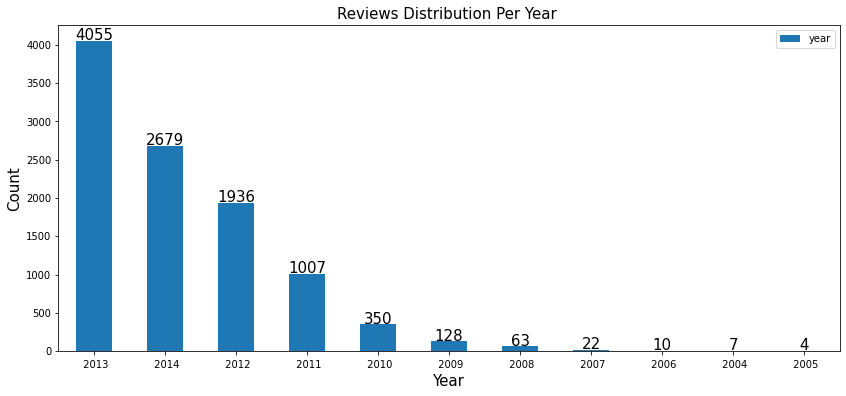

In [30]:
axx=y.plot(kind='bar', figsize=(14,6))
for i, v in y.reset_index().iterrows():
    axx.text(i, v.year + 70, v.year, color='black',ha="center", va="center",fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Reviews Distribution Per Year ',fontsize=15)
plt.legend()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Reviews Distribution per Month Aggregated Over the Years

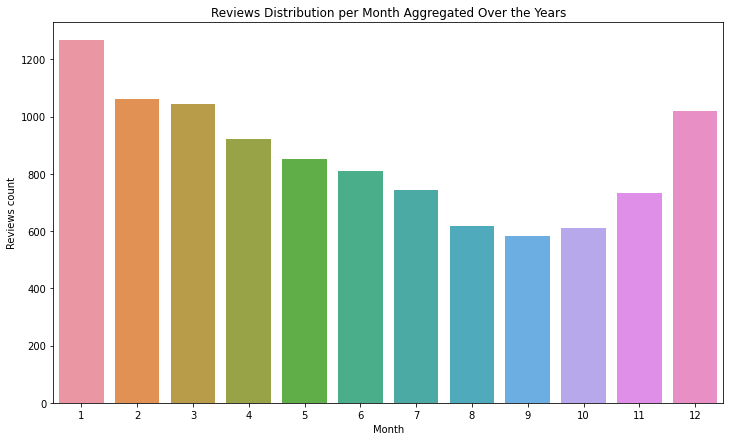

In [31]:
month_df= (data.groupby(['month'])['reviewText'].count()).reset_index()
month_df['month']=month_df['month'].astype('int64')
month_df.sort_values(by=['month'])
sns.barplot(x="month", y="reviewText", data=month_df)
plt.gcf().set_size_inches(12,7)
plt.title('Reviews Distribution per Month Aggregated Over the Years')
plt.xlabel('Month')
plt.ylabel('Reviews count')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Reviews Distribution per Day Aggregated Over the Years

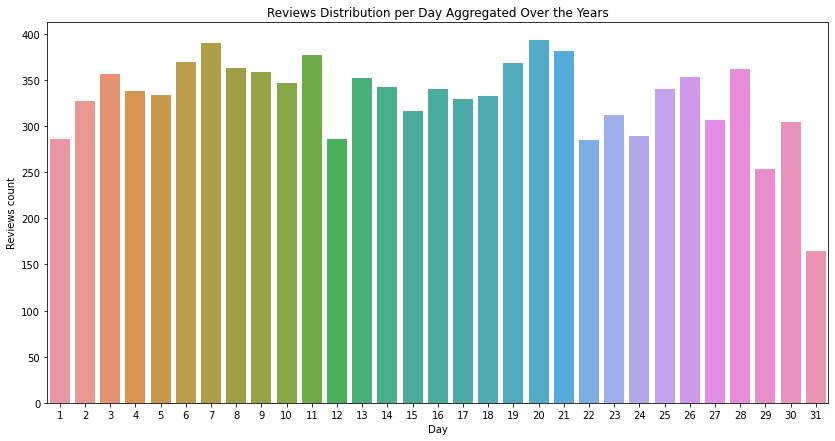

In [32]:
day_df= (data.groupby(['day'])['reviewText'].count()).reset_index()
day_df['day']=day_df['day'].astype('int64')
day_df.sort_values(by=['day'])
sns.barplot(x="day", y="reviewText", data=day_df)
plt.gcf().set_size_inches(14,7)
plt.title('Reviews Distribution per Day Aggregated Over the Years')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

### The Helpful Rate
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
The helpful feature in the dataset has values in list [x,y] format, which means that out of y people x people found that review helpful. But with this format, it will be difficult to add value to the dataset. A helpful_rate feature is created which returns the X/Y value from [x,y]

The helpful_rate gives a value between 0.00 and 1.00.

So 0.00 refers to that the review is not helpful at all, and 1.00 refers to that the review is very helpful.

In [33]:
data['x'] =data.apply(lambda row : row['helpful'].split(',')[0].replace('[',''), axis=1)
data['y'] =data.apply(lambda row : row['helpful'].split(',')[1].replace(']',''), axis=1)

In [34]:
data['x'] = data['x'].astype(str).astype(np.int64)
data['y'] = data['y'].astype(str).astype(np.int64)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   reviewerID             10261 non-null  object 
 1   asin                   10261 non-null  object 
 2   helpful                10261 non-null  object 
 3   reviewText             10261 non-null  object 
 4   overall                10261 non-null  float64
 5   summary                10261 non-null  object 
 6   reviewText_word_count  10261 non-null  int64  
 7   summary_word_count     10261 non-null  int64  
 8   year                   10261 non-null  object 
 9   month                  10261 non-null  object 
 10  day                    10261 non-null  object 
 11  x                      10261 non-null  int64  
 12  y                      10261 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 1.0+ MB


In [36]:
data['helpful_rate'] = data['x']/data['y']

In [37]:
data['helpful_rate']=data['helpful_rate'].fillna(0)
data['helpful_rate']=data['helpful_rate'].round(2)

In [38]:
data.drop(['helpful','x','y'], axis=1, inplace=True)

In [39]:
data.sample(5)

reviewerID        asin  \
5439  A1AUDW7X02EEPJ  B000RNB720   
7225  A2MFJ6C67AL015  B002DYJEMQ   
8472   A87NFCCTUG4PO  B0042EZH6W   
1871  A1XXS0OSY2JLHW  B0002E3FCO   
7952   AENULRBQ2IE5I  B003GEBGA0   

                                             reviewText  overall  \
5439  This is great for keeping your pedal board mor...      5.0   
7225  This was a gift for a friend who is a Beatles ...      5.0   
8472  This is really a great amp for the price.  If ...      5.0   
1871  I use this everyday.  It has prolonged the lif...      5.0   
7952  Haven't used it with the singer in my band but...      4.0   

                                 summary  reviewText_word_count  \
5439                      Great Product!                     24   
7225                        Guitar picks                     29   
8472  Completely Blown Away By This Amp!                    221   
1871                       Everyday use.                     20   
7952                    Seems to be fine                     98   

      summary_word_count   year month day  helpful_rate  
5439                   2   2013    07  10           0.0  
7225                   2   2013    09   4           1.0  
8472                   6   2012    04  18           1.0  
1871                   2   2012    12  25           0.0  
7952                   4   2014    01  25           0.0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Reviews Helpfulness Rate

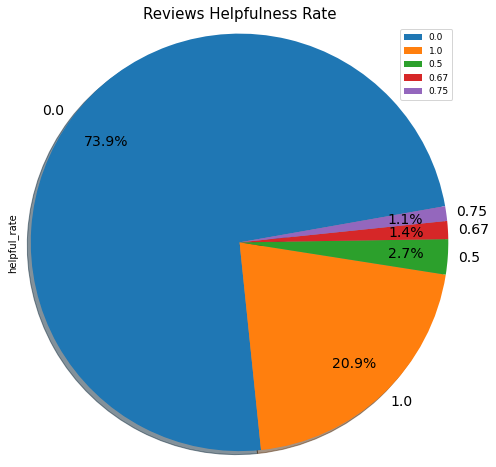

In [40]:
data['helpful_rate'].value_counts().head(5).plot(kind='pie',figsize=(8,8),radius=1.2,startangle=10,autopct='%0.1f%%',
      shadow=True,fontsize=14,labeldistance=1.05,pctdistance=0.8)

plt.title('Reviews Helpfulness Rate',fontsize=15)
plt.legend(loc='upper right', prop={'size':9})
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Percentage of Helpful Reviews By Overall Rating
##### Define "helpful reviews" as ones with a helpful_rate percentage of more than 75%. Then we'll find out if the rating distribution of helpful reviews only is different from the ratings from all reviews.

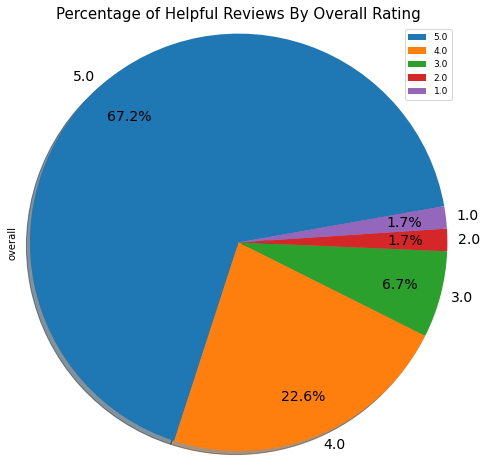

In [41]:
data.loc[data['helpful_rate'] > 0.75,'overall'].value_counts().plot(kind='pie',figsize=(8,8),radius=1.2,startangle=10,autopct='%0.1f%%',
      shadow=True,fontsize=14,labeldistance=1.05,pctdistance=0.8)

plt.title('Percentage of Helpful Reviews By Overall Rating',fontsize=15)
plt.legend(loc='upper right', prop={'size':9})
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Top 10 Products with the Highest Helpful Reviews

In [42]:
hl_df=data.loc[data['helpful_rate'] == 1,'asin'].value_counts().head(10)

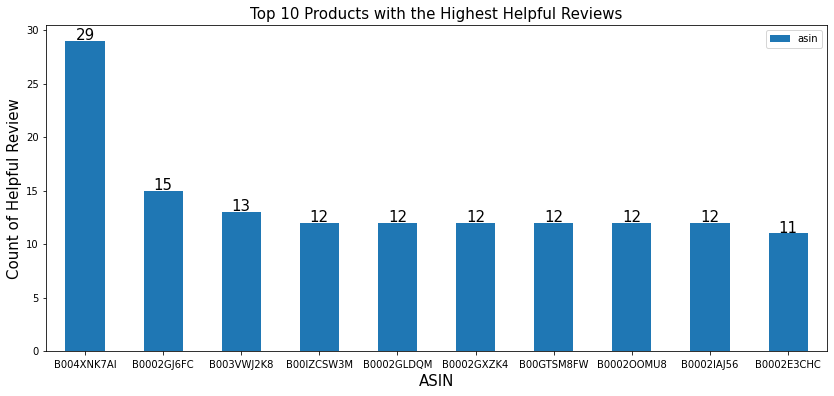

In [43]:
axl=hl_df.plot(kind='bar', figsize=(14,6))
for i, v in hl_df.reset_index().iterrows():
    axl.text(i, v.asin + 0.5, v.asin, color='black',ha="center", va="center",fontsize=15)
plt.ylabel('Count of Helpful Review',fontsize=15)
plt.xlabel('ASIN',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Top 10 Products with the Highest Helpful Reviews',fontsize=15)
plt.legend()
plt.show()

## Deciding on the Nature of the Sentiment
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
#### The sentiments of the review are decided on the overall score.

##### 1- if the overall score is greater than 3, the sentiment is Positive
##### 2- if the overall value is less than 3, the sentiment is Negative
##### 3- and if it is equal to 3, the sentiment is Neutral.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Creating a Sentiment Column

In [44]:
data.loc[data['overall'] > 3  ,'sentiment'] = 'Positive'

In [45]:
data.loc[data['overall'] < 3  ,'sentiment'] = 'Negative'

In [46]:
data.loc[data['overall'] == 3  ,'sentiment'] = 'Neutral'

In [47]:
data.sample(n=10)

reviewerID        asin  \
1475  A341MNU9GWBWKS  B0002E1O2M   
470    A7E0CJH464L82  B0002CZVK0   
8723  A3W2KQ6CLTQ0ZD  B004OK17QS   
6917  A2RS66Y79Q8X0W  B001QWBM62   
4425  A2QMNA0ZT6XMRR  B000CD3QY2   
4269  A2UX9BF36MYEXK  B000BKY8CU   
4041  A12P4A1OC41KUO  B0009G1E0K   
597   A34WEXT7SIRFE4  B0002CZW0Y   
5208   A2RVY2GDMZHH4  B000OMG0KI   
6233   A67OJZLHBBUQ9  B0018TAITA   

                                             reviewText  overall  \
1475  I read several reviews before purchasing these...      5.0   
470   Well, just got one of this and been messin wit...      5.0   
8723  This is the first and only TC Electronic produ...      5.0   
6917  I own both the H1 and H4n and I love them both...      5.0   
4425  Wow!  This is the pedal to own.  There are a l...      5.0   
4269  I'm a heavier fellow (5'11, 220) and some of t...      5.0   
4041  for the price u cant go wrong. its long enough...      5.0   
597   Don't even hesitate buying this thing. It's ev...      5.0   
5208  Standard great quality from Planet Waves/D'add...      5.0   
6233  Always good to have a stationary MIc on the fl...      5.0   

                                         summary  reviewText_word_count  \
1475                                 Great tone!                    119   
470                        Now that's a wah wah!                     67   
8723                       Absoulutely the best!                    137   
6917                        Great field recorder                    570   
4425              The original, but even better!                     81   
4269  A very comfortable bench at a great price.                     63   
4041                                    strap up                     29   
597                       Does the job properly.                     36   
5208          Great Product but prices fluctuate                     32   
6233                                  Die cast !                     51   

      summary_word_count   year month day  helpful_rate sentiment  
1475                   2   2014    02  14           0.0  Positive  
470                    5   2012    05  14           0.0  Positive  
8723                   3   2012    01   7           1.0  Positive  
6917                   3   2013    05  13           0.0  Positive  
4425                   5   2013    11  19           0.0  Positive  
4269                   8   2013    05   7           0.0  Positive  
4041                   2   2013    09   1           0.0  Positive  
597                    4   2010    11  25           0.0  Positive  
5208                   5   2014    02   5           0.0  Positive  
6233                   3   2013    07   2           0.0  Positive

In [48]:
print('The count of sentiments:')
pd.DataFrame(data['sentiment'].value_counts())

The count of sentiments:


sentiment
Positive       9022
Neutral         772
Negative        467

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Sentiments of Reviews as a Percentage

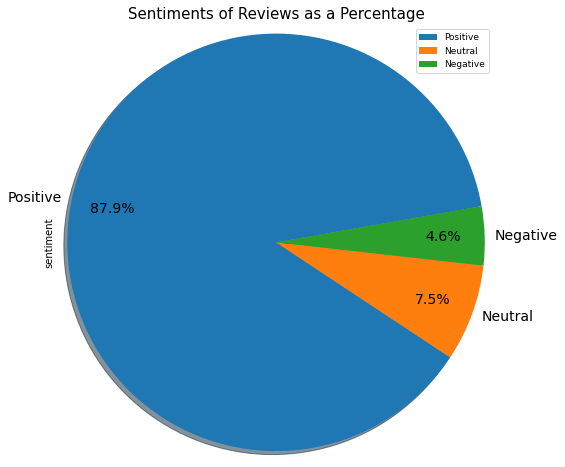

In [49]:
data['sentiment'].value_counts().plot(kind='pie',figsize=(8,8),radius=1.2,startangle=10,autopct='%0.1f%%',
      shadow=True,fontsize=14,labeldistance=1.05,pctdistance=0.8)

plt.title('Sentiments of Reviews as a Percentage',fontsize=15)
plt.legend(loc='upper right', prop={'size':9})
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Distribution of Sentiment over the Years

In [50]:
data.groupby(['year','sentiment']).size()

year   sentiment
 2004  Positive        7
 2005  Positive        4
 2006  Negative        1
       Neutral         1
       Positive        8
 2007  Negative        1
       Positive       21
 2008  Negative        2
       Neutral         7
       Positive       54
 2009  Negative        5
       Neutral         8
       Positive      115
 2010  Negative       16
       Neutral        20
       Positive      314
 2011  Negative       46
       Neutral        84
       Positive      877
 2012  Negative       85
       Neutral       130
       Positive     1721
 2013  Negative      170
       Neutral       319
       Positive     3566
 2014  Negative      141
       Neutral       203
       Positive     2335
dtype: int64

This shows that Negative sentiment reviews were increased during the year 2013 and 2014.

In [51]:
categories = list(data['sentiment'].value_counts().keys())

In [52]:
categories

['Positive', 'Neutral', 'Negative']

In [53]:
dict = {}
for category in categories:
    dict[category] = data.loc[data['sentiment']== category,'year'].value_counts()

In [54]:
pd.DataFrame(dict)

Positive  Neutral  Negative
 2004         7      NaN       NaN
 2005         4      NaN       NaN
 2006         8      1.0       1.0
 2007        21      NaN       1.0
 2008        54      7.0       2.0
 2009       115      8.0       5.0
 2010       314     20.0      16.0
 2011       877     84.0      46.0
 2012      1721    130.0      85.0
 2013      3566    319.0     170.0
 2014      2335    203.0     141.0

In [55]:
sentiment_df = pd.DataFrame(dict)
for col in sentiment_df:
    sentiment_df.replace(np.nan, 0, inplace=True)

In [56]:
sentiment_df = sentiment_df.assign(tmp=sentiment_df.sum(axis=1)).sort_values('tmp', ascending=False).drop('tmp', 1)

C:\Users\ITEK\AppData\Local\Temp/ipykernel_7736/2002755571.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [57]:
sentiment_df

Positive  Neutral  Negative
 2013      3566    319.0     170.0
 2014      2335    203.0     141.0
 2012      1721    130.0      85.0
 2011       877     84.0      46.0
 2010       314     20.0      16.0
 2009       115      8.0       5.0
 2008        54      7.0       2.0
 2007        21      0.0       1.0
 2006         8      1.0       1.0
 2004         7      0.0       0.0
 2005         4      0.0       0.0

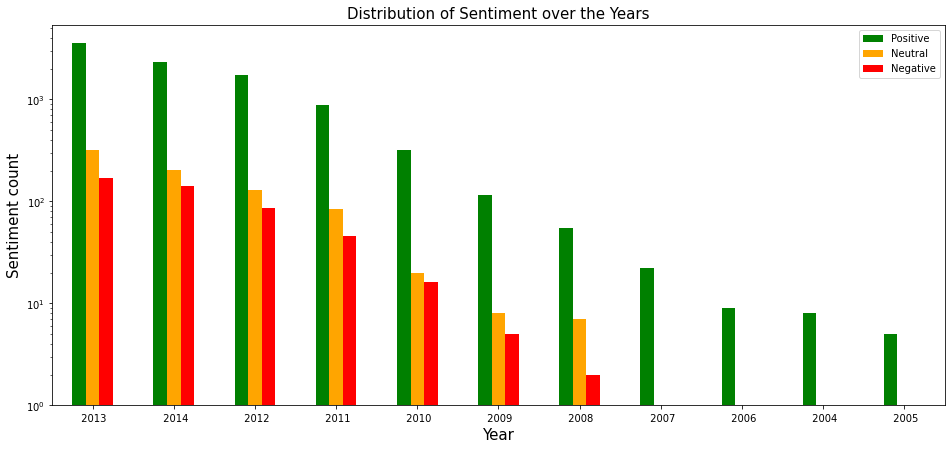

In [58]:
sentiment_df.plot(kind='bar',figsize=(16,7),log=True,color=['green', 'orange', 'red'])

plt.ylabel('Sentiment count',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Distribution of Sentiment over the Years',fontsize=15)
plt.legend()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Distribution of Sentiment over the Years

<AxesSubplot:xlabel='year'>

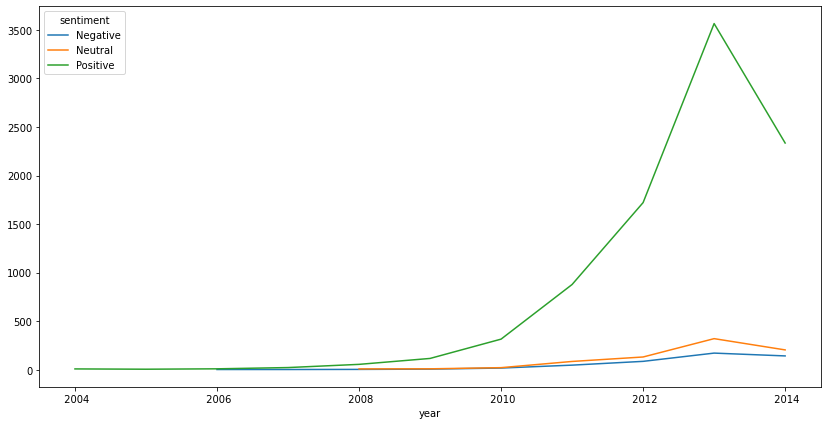

In [59]:
data.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(kind='line', figsize=(14,7))

Insights: From the plot, we can clearly see the rise in positive reviews from 2010. Reached its peak around 2013 and there is a dip in 2014, All the review rates dropped at this time. Negative and neutral reviews are very low as compared to positive reviews.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Top 10 Products with Positive Sentiment

In [60]:
p_df=data.loc[data['sentiment'] == 'Positive', 'asin'].value_counts().head(10)

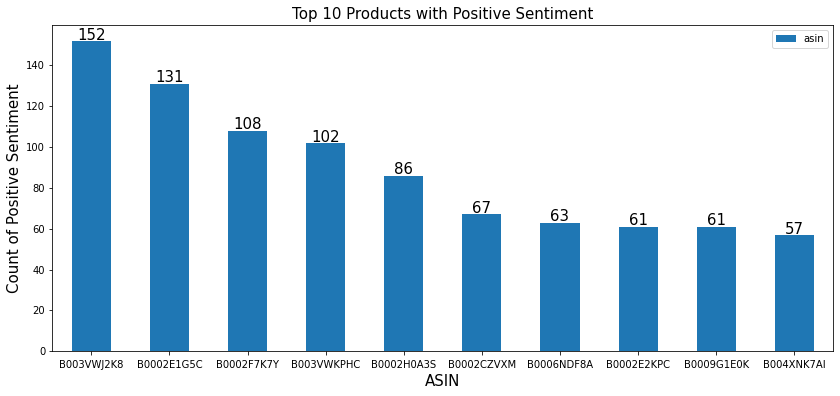

In [61]:
axp=p_df.plot(kind='bar', figsize=(14,6))
for i, v in p_df.reset_index().iterrows():
    axp.text(i, v.asin + 2.8, v.asin, color='black',ha="center", va="center",fontsize=15)
plt.ylabel('Count of Positive Sentiment',fontsize=15)
plt.xlabel('ASIN',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Top 10 Products with Positive Sentiment',fontsize=15)
plt.legend()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Top 10 Products with Neutral Sentiment

In [62]:
ne_df=data.loc[data['sentiment'] == 'Neutral', 'asin'].value_counts().head(10)

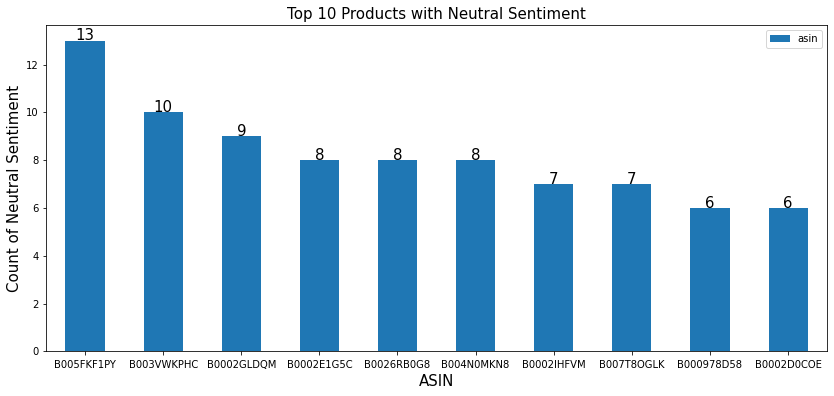

In [63]:
axne=ne_df.plot(kind='bar', figsize=(14,6))
for i, v in ne_df.reset_index().iterrows():
    axne.text(i, v.asin + 0.2, v.asin, color='black',ha="center", va="center",fontsize=15)
plt.ylabel('Count of Neutral Sentiment',fontsize=15)
plt.xlabel('ASIN',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Top 10 Products with Neutral Sentiment',fontsize=15)
plt.legend()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Top 10 Products with Negative Sentiment

In [64]:
n_df=data.loc[data['sentiment'] == 'Negative', 'asin'].value_counts().head(10)

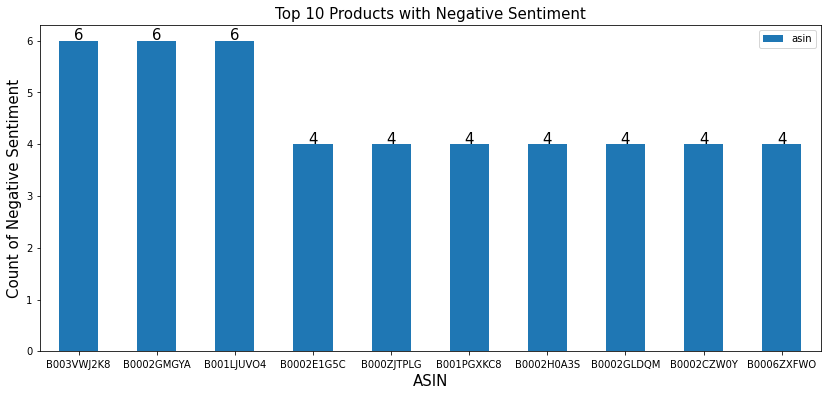

In [65]:
axnn=n_df.plot(kind='bar', figsize=(14,6))
for i, v in n_df.reset_index().iterrows():
    axnn.text(i, v.asin + 0.1, v.asin, color='black',ha="center", va="center",fontsize=15)
plt.ylabel('Count of Negative Sentiment',fontsize=15)
plt.xlabel('ASIN',fontsize=15)
plt.xticks(rotation=0, ha="center", va="center")
plt.tick_params(axis='x', which='major', pad=10)
plt.title('Top 10 Products with Negative Sentiment',fontsize=15)
plt.legend()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Correlation of Sentiment and Helpful Rate

In [66]:
pd.DataFrame(data.groupby('sentiment')['helpful_rate'].mean())

helpful_rate
sentiment              
Negative       0.307559
Neutral        0.275687
Positive       0.260505

From the table, we can see that the mean of helpful_rate is higher for negative reviews than for neutral and positive reviews. These mean values might have been influenced by the 0 values in helpful rates.

### Review Text Punctuation and Stop Words Cleaning

Convert the text to lowercase, remove text in square brackets, remove links, remove punctuation and remove words containing numbers.

    
Coming to stop words, general nltk stop words contains words like “the”, “a”, “an”, “in”, and in our dataset "not", "hasn't", "would'nt" will conveys a negative sentiment. Removing such stop words will contradict the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.    

In [67]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all','if','but']

In [68]:
def text_cleaning(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return ' '.join(word for word in text.split() if word not in stop_words)

In [69]:
data['reviewText'] = data['reviewText'].apply(lambda x: text_cleaning(x))
#data.head()

### Summary Punctuation and Stop Words Cleaning
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [70]:
data['summary'] = data['summary'].apply(lambda x: text_cleaning(x))
#data.head()

## N-Gram Analysis
![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

Here we will be using N-Grams to analyze the text based on its sentiment.

In [71]:
#Filtering data
positive_sentiment = data[data["sentiment"]=='Positive'].dropna()
neutral_sentiment = data[data["sentiment"]=='Neutral'].dropna()
negative_sentiment = data[data["sentiment"]=='Negative'].dropna()

# custom function for ngram generation
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

In [72]:
# custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = {"color" : color},
    )
    return trace

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
#### Unigram Analysis
##### Here we will plot the most frequent one word in reviews based on sentiments

In [73]:
def create_sentiment(sentiment,colum_name,color, number_of_grams=1):
    #Get the bar chart from positive reviews
    freq_dict = defaultdict(int)
    for sent in sentiment[colum_name]:
        for word in generate_ngrams(sent,number_of_grams):
            freq_dict[word] += 1
    fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
    fd_sorted.columns = ["word", "wordcount"]
    return horizontal_bar_chart(fd_sorted.head(20), color)

In [74]:
trace0 = create_sentiment(positive_sentiment,"reviewText", 'green')
trace1 = create_sentiment(neutral_sentiment,"reviewText", 'orange')
trace2 = create_sentiment(negative_sentiment,"reviewText", 'red')

In [75]:
iplot.init_notebook_mode()

C:\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



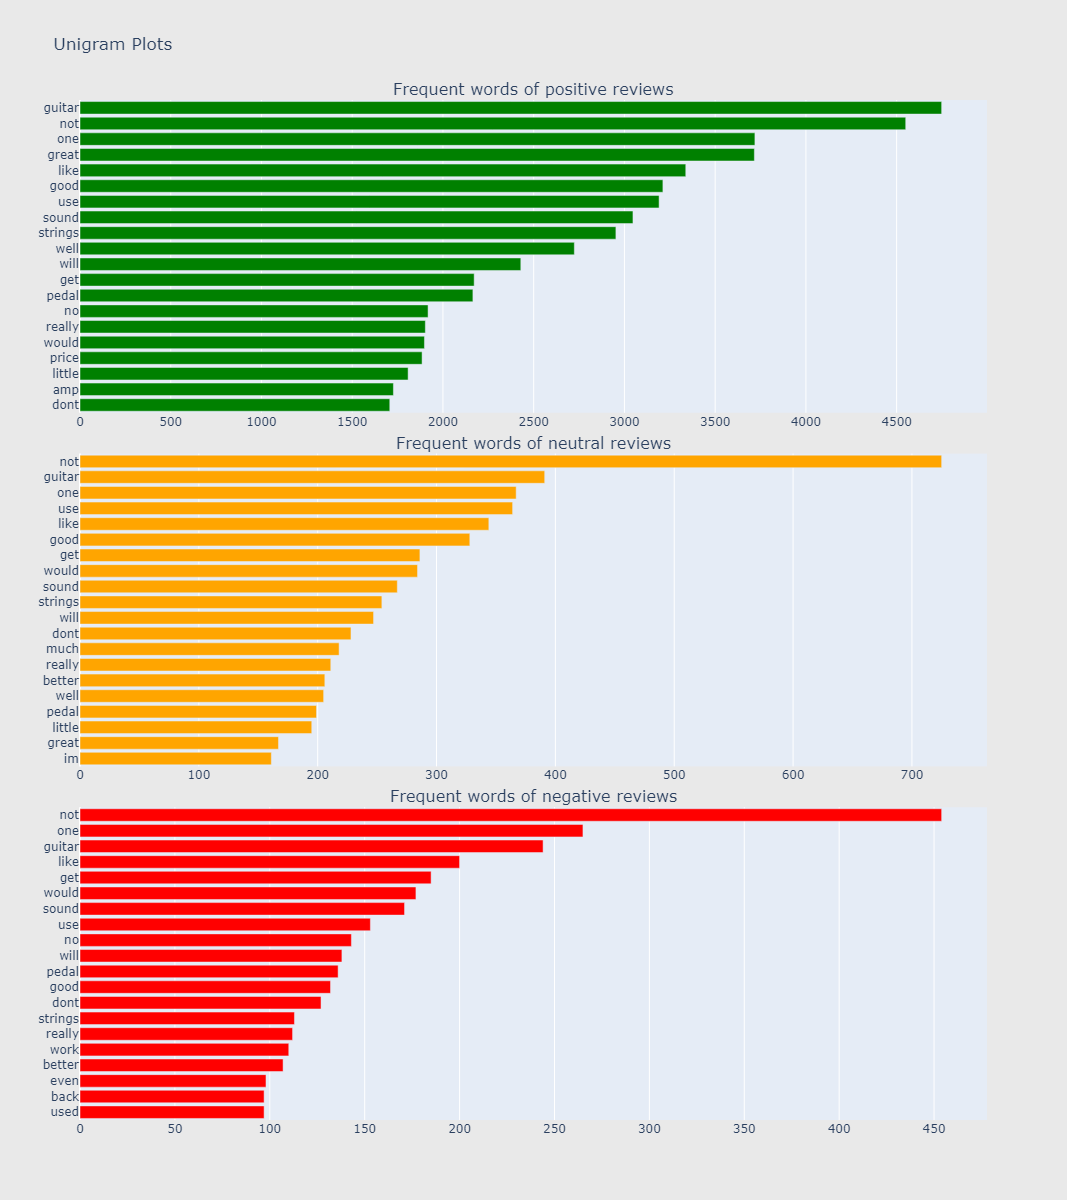

In [76]:
# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Unigram Plots")
iplot.iplot(fig, filename='word-plots')

##### Here we will plot the most frequent one word in Summaries based on sentiments

In [77]:
trace0 = create_sentiment(positive_sentiment,"summary", 'green')
trace1 = create_sentiment(neutral_sentiment,"summary", 'orange')
trace2 = create_sentiment(negative_sentiment,"summary", 'red')

C:\Python\Python310\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



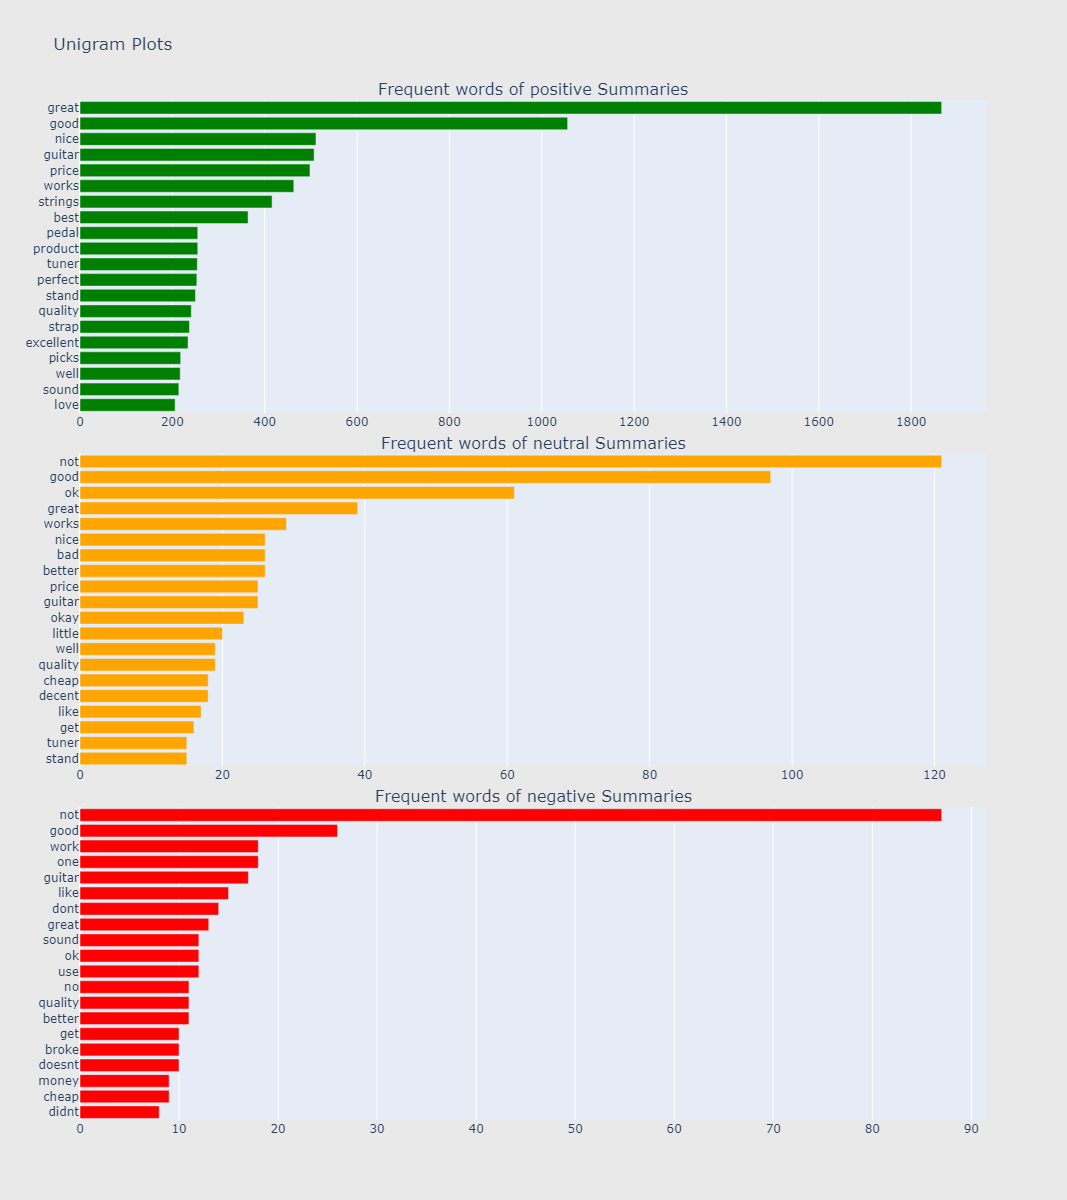

In [78]:
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive Summaries", "Frequent words of neutral Summaries",
                                          "Frequent words of negative Summaries"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Unigram Plots")
iplot.iplot(fig, filename='word-plots')

As we see, the one word doesn't match with the sentiment except a few. Through Monogram, we can't judge a sentiment based on one word. So we need to analyze with frequent two words.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
#### Bigram Analysis

##### Here we will plot the most frequent two words in reviews based on sentiments

In [79]:
trace0 = create_sentiment(positive_sentiment,"reviewText", 'green',2)
trace1 = create_sentiment(neutral_sentiment,"reviewText", 'orange',2)
trace2 = create_sentiment(negative_sentiment,"reviewText", 'red',2)

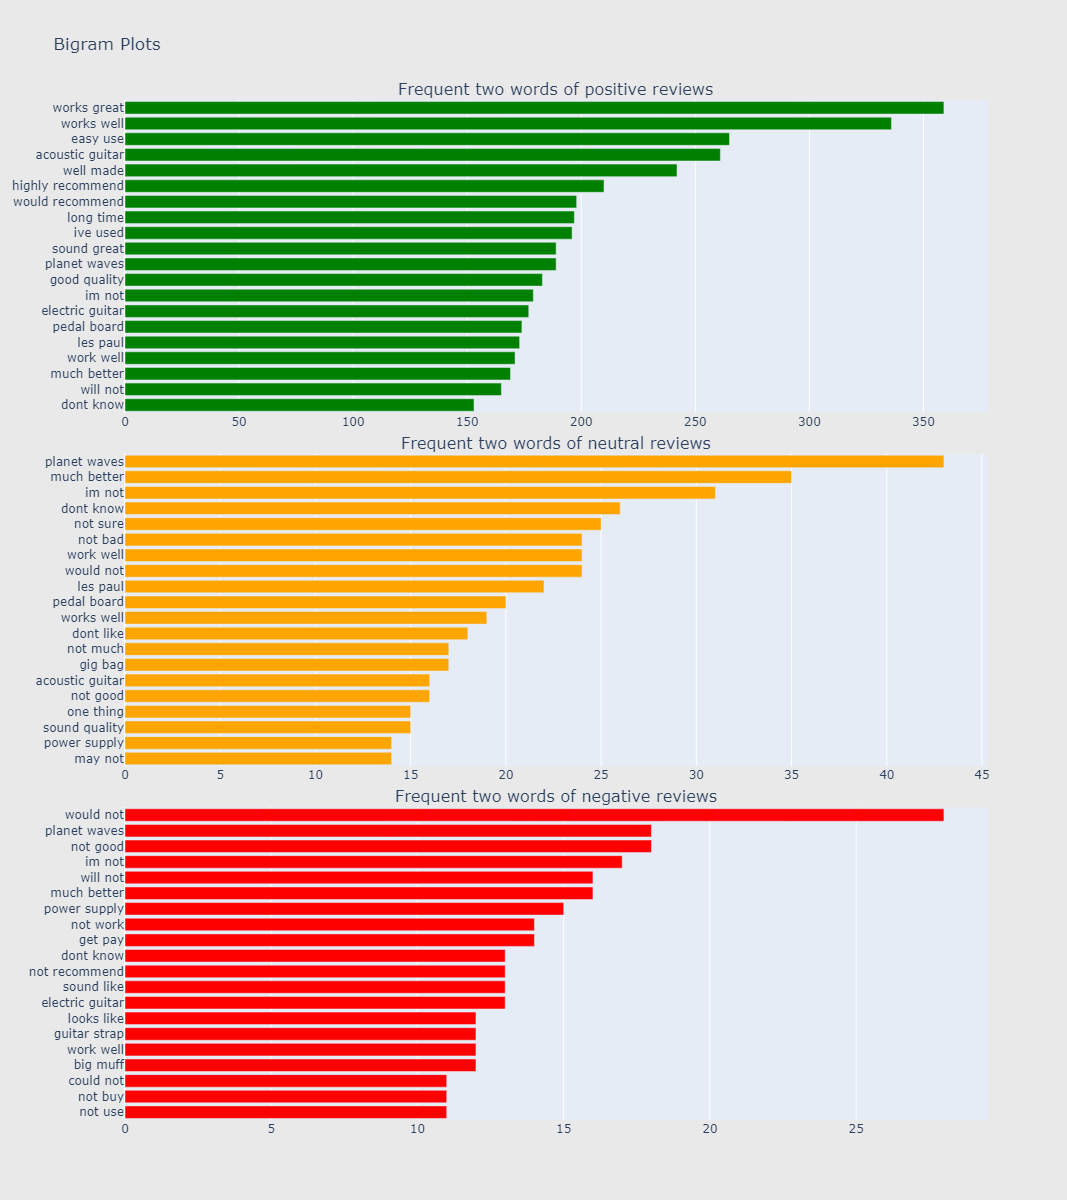

In [80]:
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent two words of positive reviews", "Frequent two words of neutral reviews",
                                          "Frequent two words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot.iplot(fig, filename='word-plots')

##### Here we will plot most frequent two words in Summaries based on sentiments

In [81]:
trace0 = create_sentiment(positive_sentiment,"summary", 'green',2)
trace1 = create_sentiment(neutral_sentiment,"summary", 'orange',2)
trace2 = create_sentiment(negative_sentiment,"summary", 'red',2)

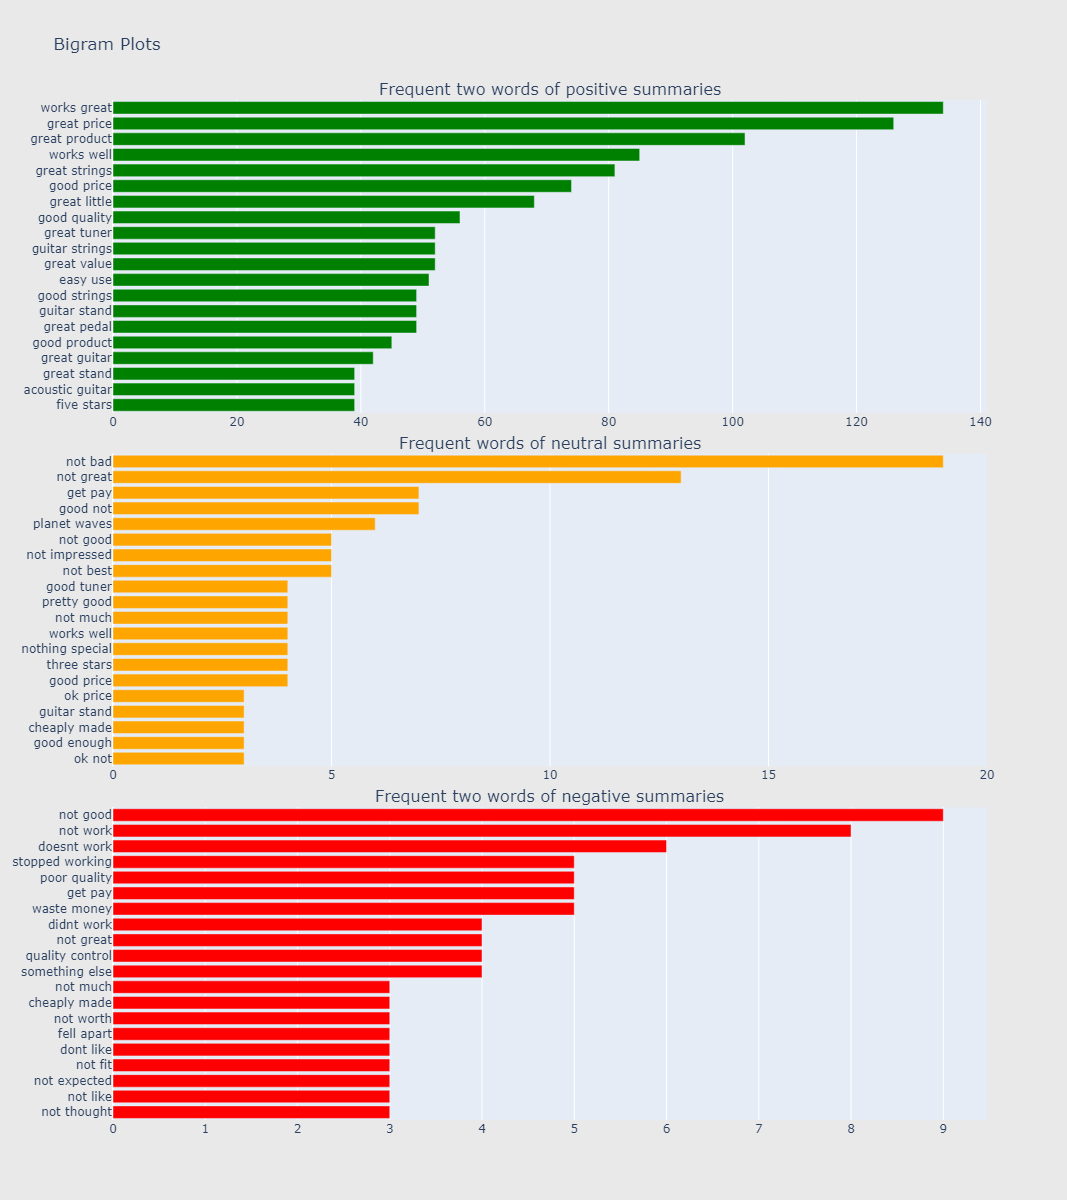

In [82]:
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent two words of positive summaries", "Frequent words of neutral summaries",
                                          "Frequent two words of negative summaries"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot.iplot(fig, filename='word-plots')

Here from the bi-words we can get somehow justify the sentiment categories and get a clear idea about the sentiments.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Trigram Analysis
##### Here we will plot most frequent three words in reviews based on sentiments

In [83]:
trace0 = create_sentiment(positive_sentiment,"reviewText", 'green',3)
trace1 = create_sentiment(neutral_sentiment,"reviewText", 'orange',3)
trace2 = create_sentiment(negative_sentiment,"reviewText", 'red',3)

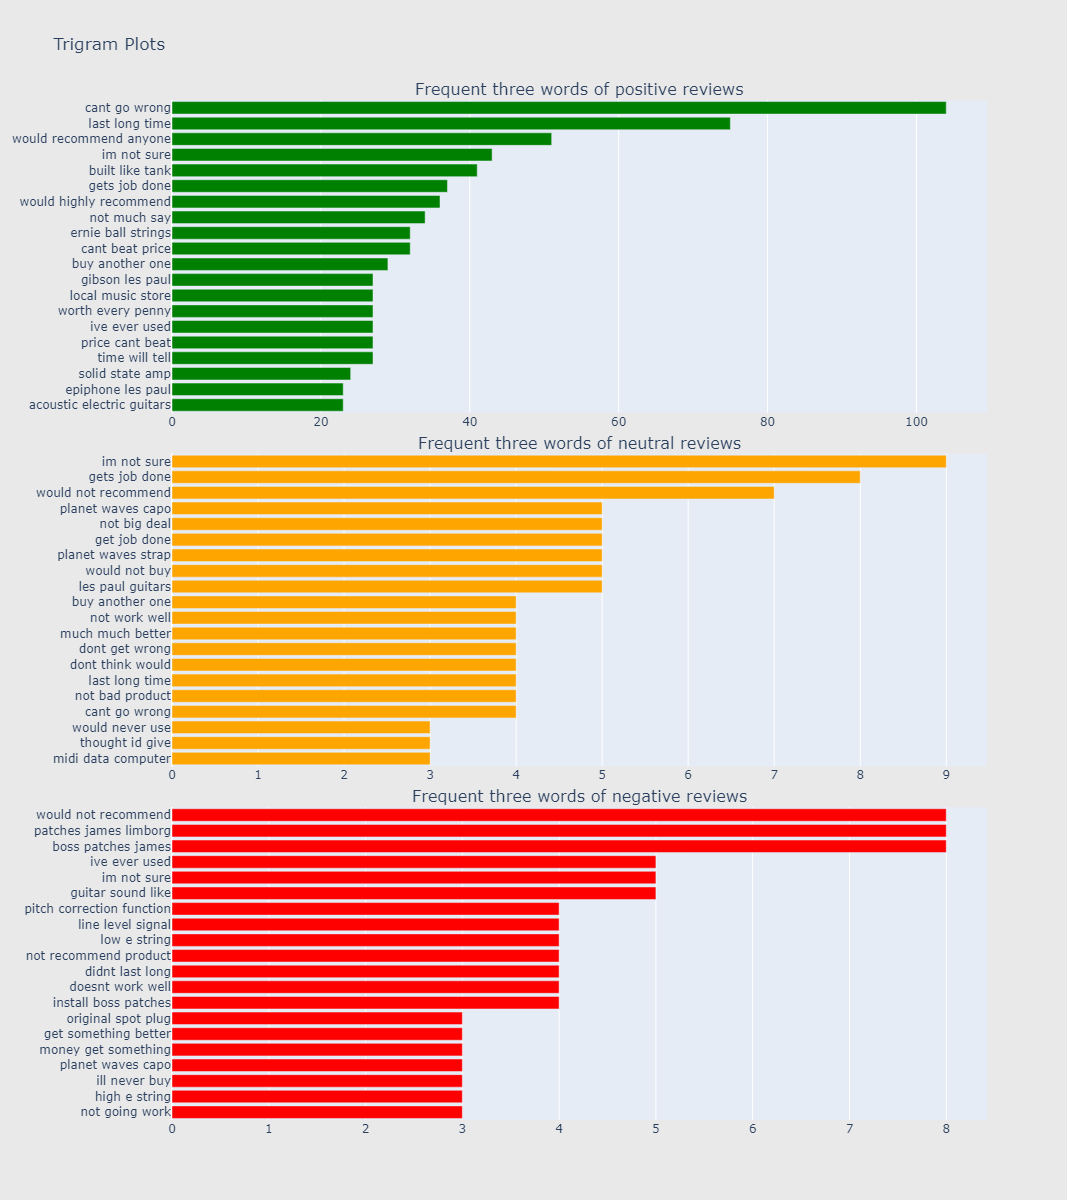

In [84]:
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent three words of positive reviews", "Frequent three words of neutral reviews",
                                          "Frequent three words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Trigram Plots")
iplot.iplot(fig, filename='word-plots')

##### Here we will plot most frequent three words in Summaries based on sentiments

In [85]:
trace0 = create_sentiment(positive_sentiment,"summary", 'green',3)
trace1 = create_sentiment(neutral_sentiment,"summary", 'orange',3)
trace2 = create_sentiment(negative_sentiment,"summary", 'red',3)

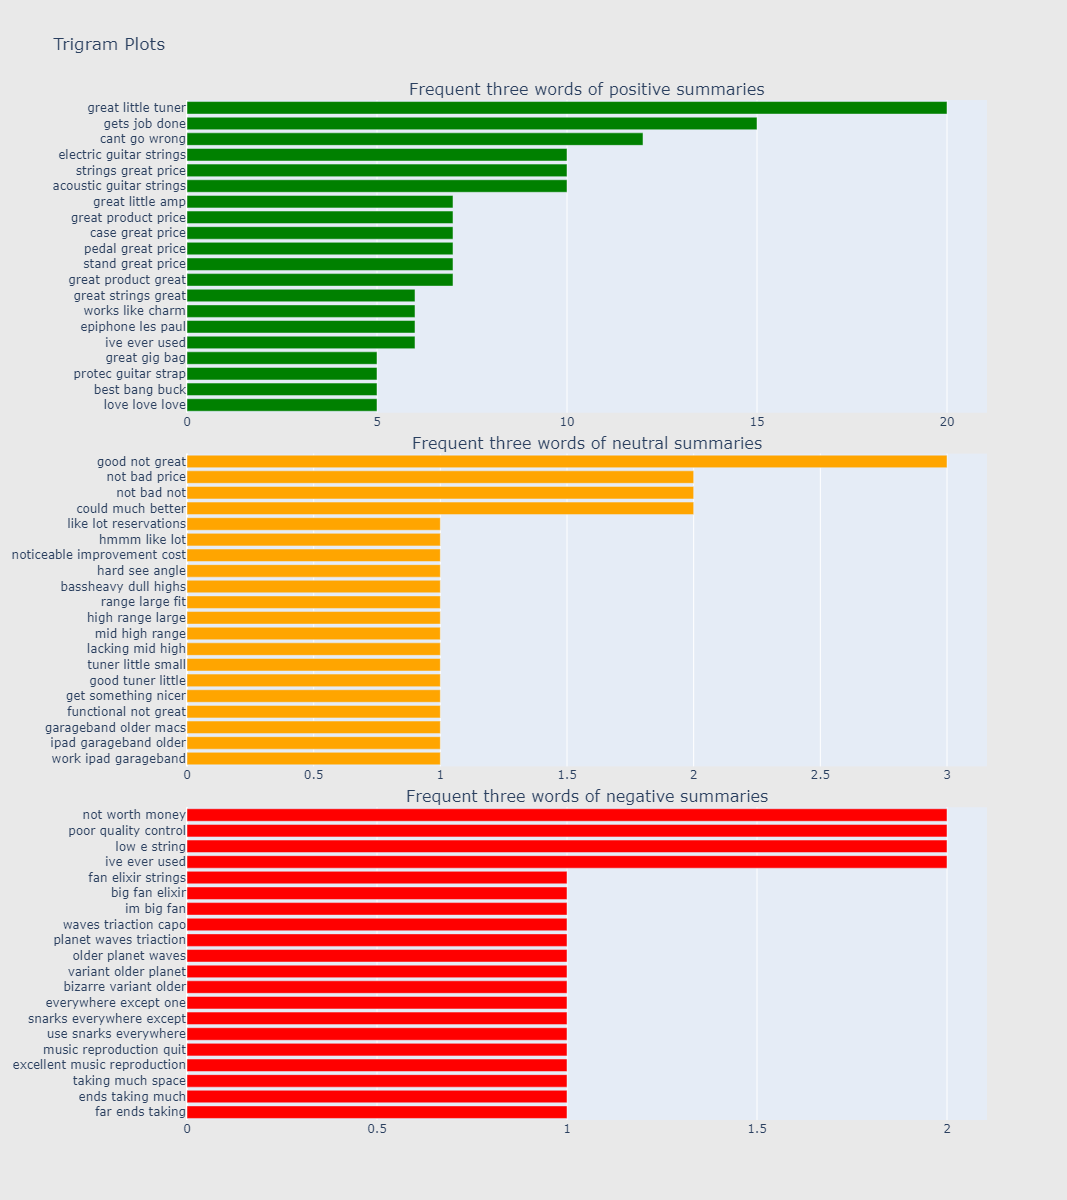

In [86]:
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent three words of positive summaries", "Frequent three words of neutral summaries",
                                          "Frequent three words of negative summaries"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Trigram Plots")
iplot.iplot(fig, filename='word-plots')